In [39]:
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import pickle
import os
import cv2 as cv

In [40]:
data_dir = 'D:/Alavandhan/data'

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.005)

data_1 = []
labels_1 = []
data_2 = []
labels_2 = []


for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_)):
        img = cv.imread(os.path.join(data_dir, dir_, img_path))
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        x_ = []
        y_ = []
        data_aux = []

        x_1 = []
        y_1 = []
        data_aux_1 = []
        
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            results = hands.process(img_rgb)
            if len(results.multi_hand_landmarks) == 1:
                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
    
                        x_.append(x)
                        y_.append(y)
    
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        data_aux.append(x - min(x_))
                        data_aux.append(y - min(y_))

                data_1.append(data_aux)
                labels_1.append(ord(dir_))
                        
            elif len(results.multi_hand_landmarks) == 2:
                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x1 = hand_landmarks.landmark[i].x
                        y1 = hand_landmarks.landmark[i].y
    
                        x_1.append(x)
                        y_1.append(y)
    
                    for i in range(len(hand_landmarks.landmark)):
                        x1 = hand_landmarks.landmark[i].x
                        y1 = hand_landmarks.landmark[i].y
                        data_aux_1.append(x1 - min(x_1))
                        data_aux_1.append(y1 - min(y_1))
                        
                data_2.append(data_aux_1)
                labels_2.append(ord(dir_))

print("ok1")

ok1


In [41]:
print(len(labels_1))
print(len(data_1))


19857
19857


In [42]:
print(len(labels_2))
print(len(data_2))

21989
21989


# Checking mediapipe landmarks

C:\Users\nakul\AppData\Local\Temp\ipykernel_10720\4043832056.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

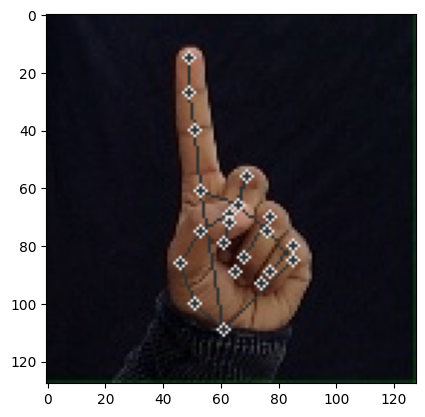

<Figure size 640x480 with 0 Axes>

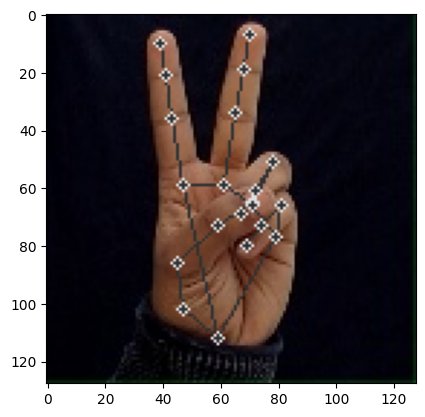

<Figure size 640x480 with 0 Axes>

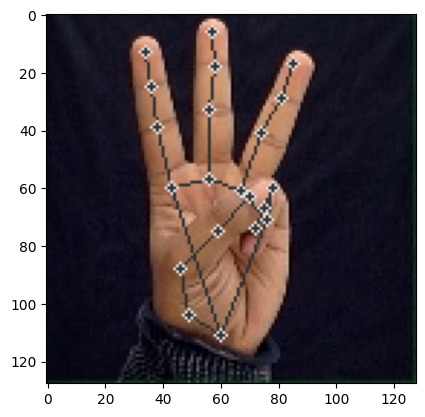

<Figure size 640x480 with 0 Axes>

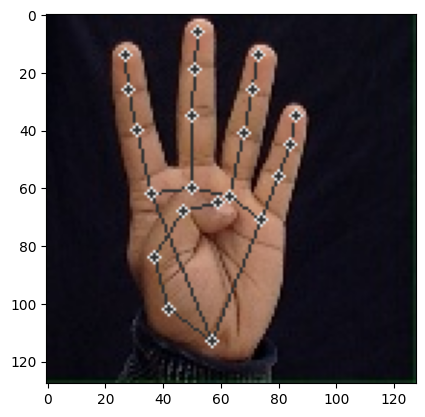

<Figure size 640x480 with 0 Axes>

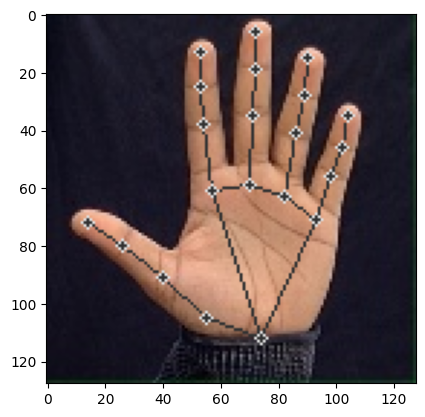

<Figure size 640x480 with 0 Axes>

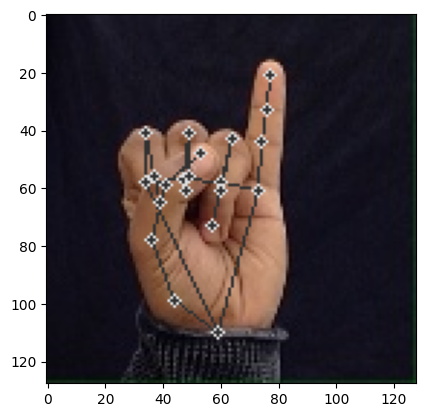

<Figure size 640x480 with 0 Axes>

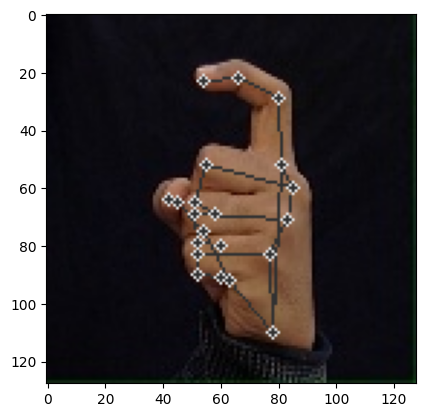

<Figure size 640x480 with 0 Axes>

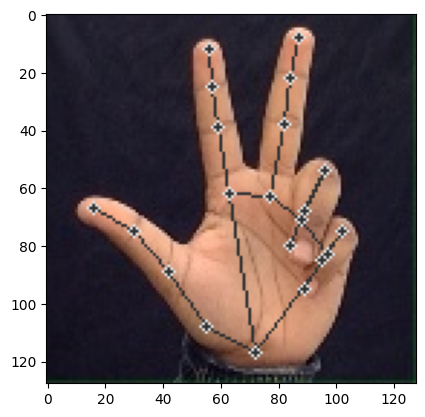

<Figure size 640x480 with 0 Axes>

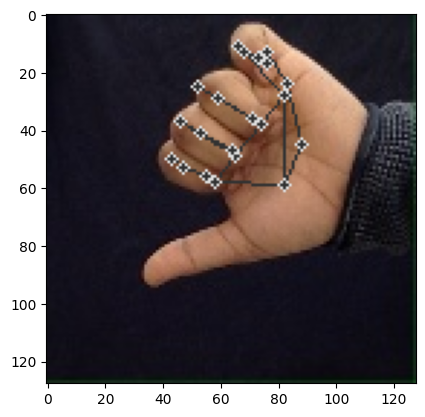

<Figure size 640x480 with 0 Axes>

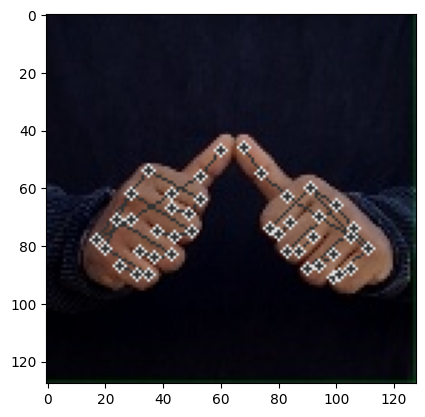

<Figure size 640x480 with 0 Axes>

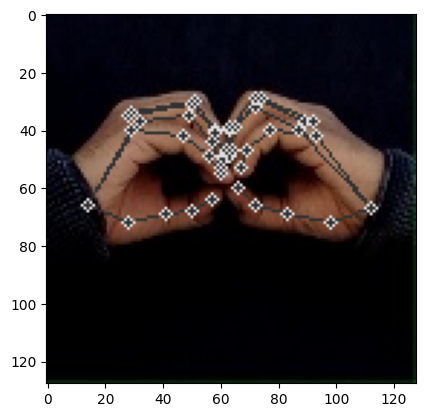

<Figure size 640x480 with 0 Axes>

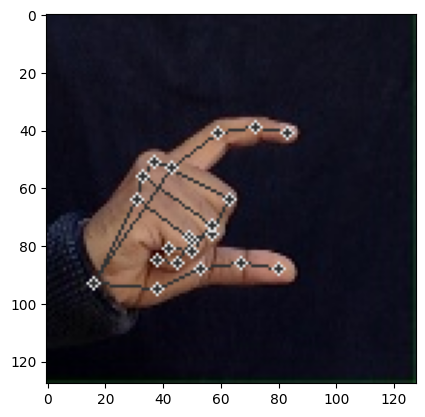

<Figure size 640x480 with 0 Axes>

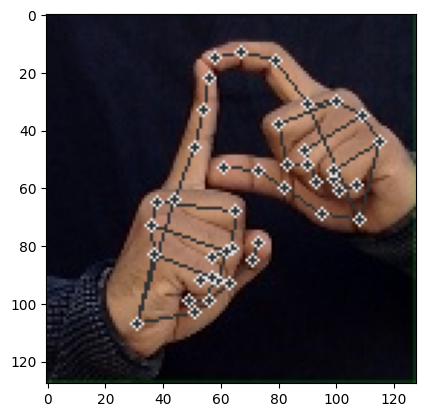

<Figure size 640x480 with 0 Axes>

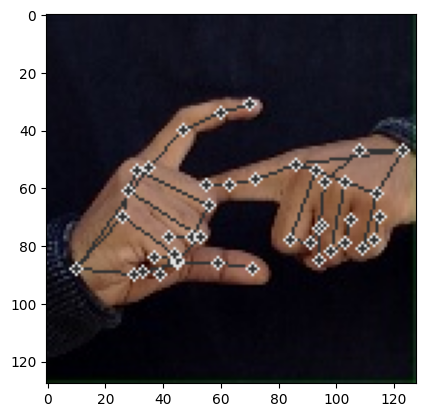

<Figure size 640x480 with 0 Axes>

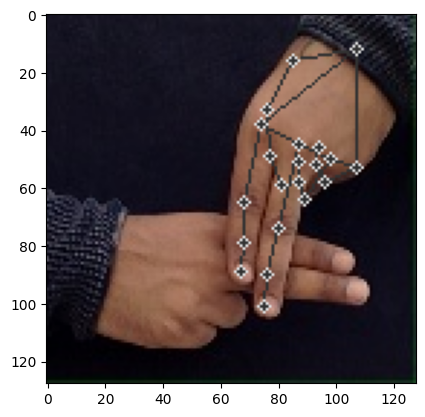

<Figure size 640x480 with 0 Axes>

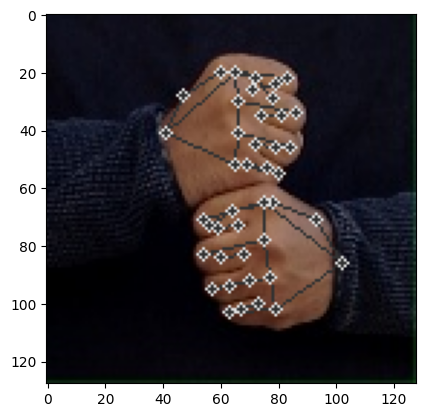

<Figure size 640x480 with 0 Axes>

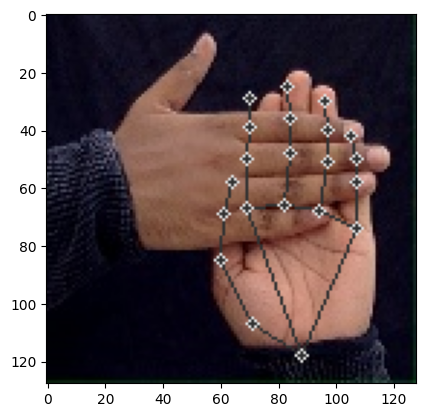

<Figure size 640x480 with 0 Axes>

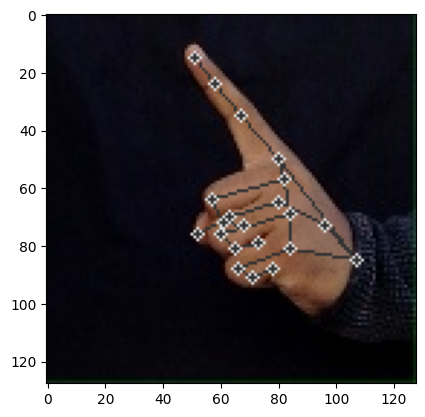

<Figure size 640x480 with 0 Axes>

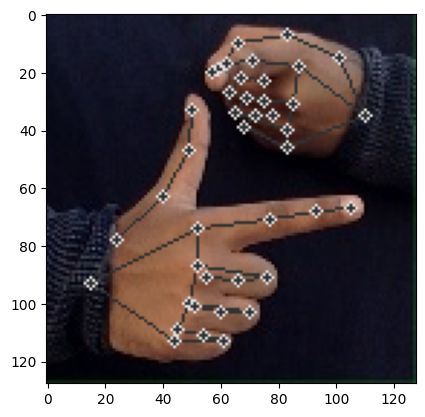

<Figure size 640x480 with 0 Axes>

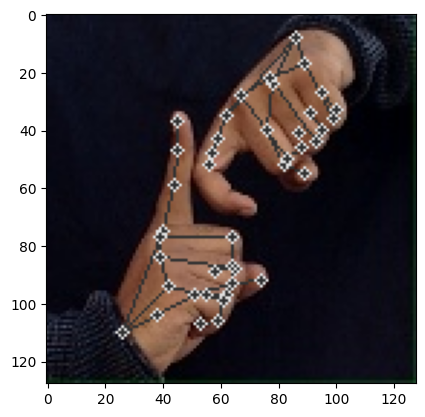

<Figure size 640x480 with 0 Axes>

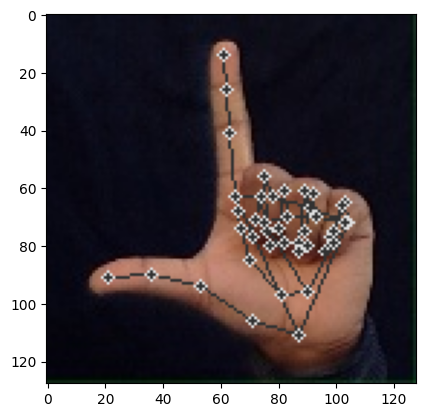

<Figure size 640x480 with 0 Axes>

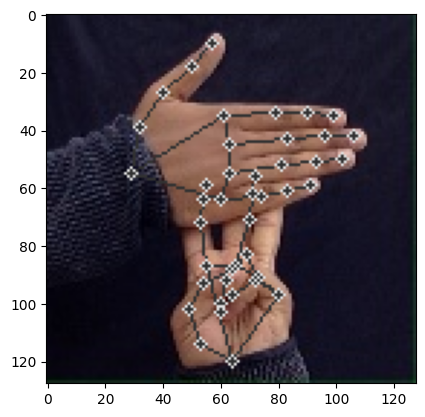

<Figure size 640x480 with 0 Axes>

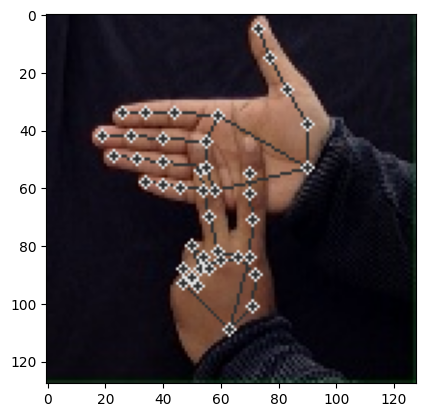

<Figure size 640x480 with 0 Axes>

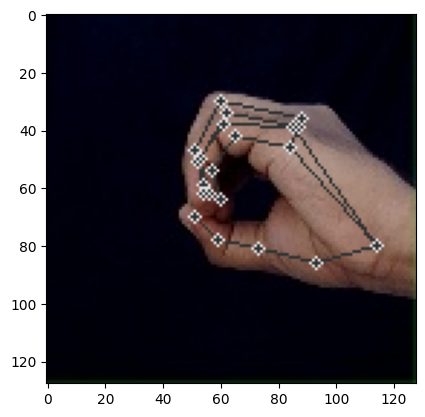

<Figure size 640x480 with 0 Axes>

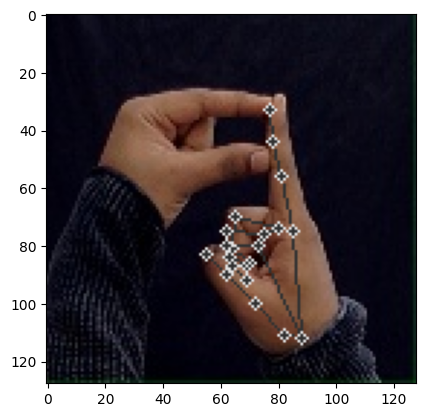

<Figure size 640x480 with 0 Axes>

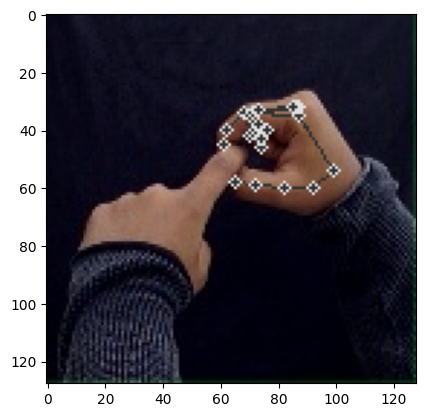

<Figure size 640x480 with 0 Axes>

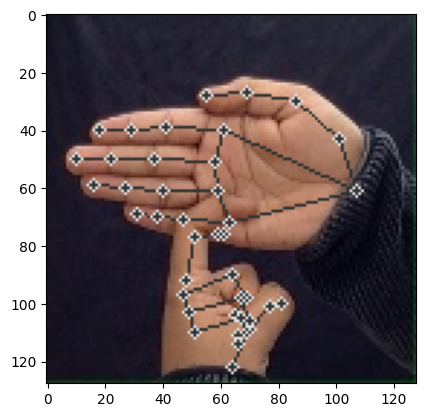

<Figure size 640x480 with 0 Axes>

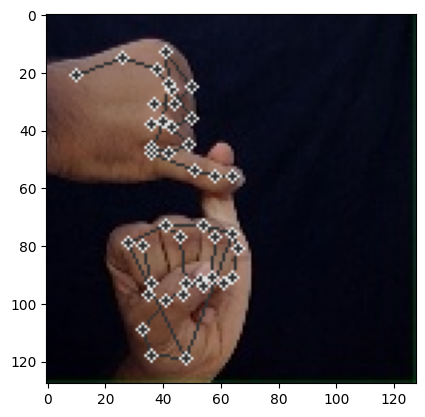

<Figure size 640x480 with 0 Axes>

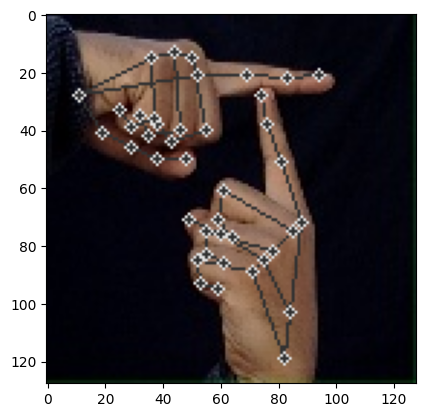

<Figure size 640x480 with 0 Axes>

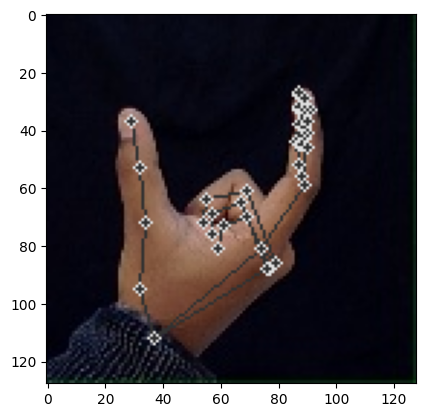

<Figure size 640x480 with 0 Axes>

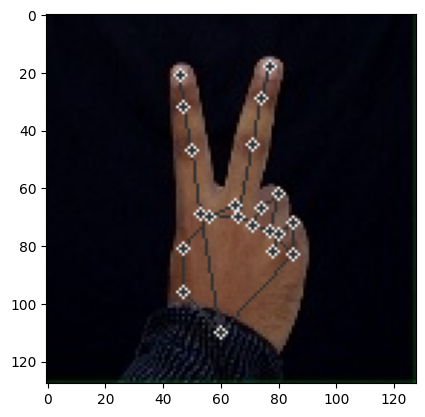

<Figure size 640x480 with 0 Axes>

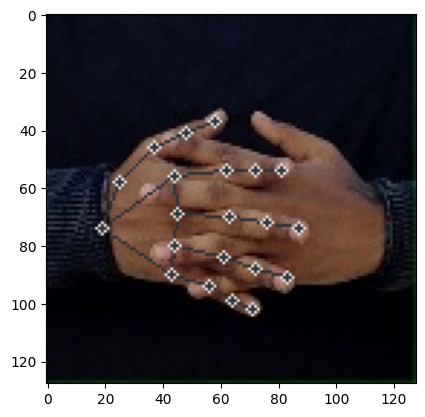

<Figure size 640x480 with 0 Axes>

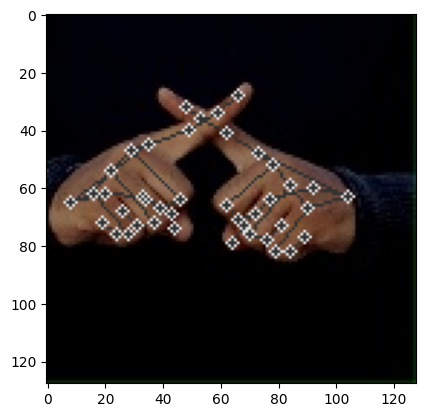

<Figure size 640x480 with 0 Axes>

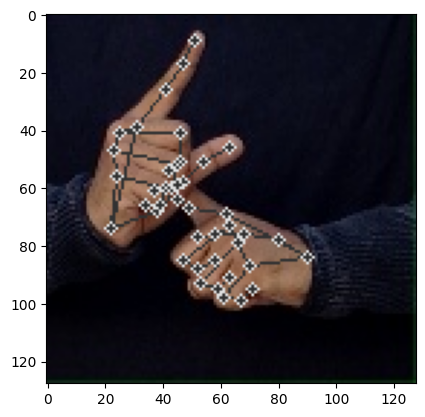

<Figure size 640x480 with 0 Axes>

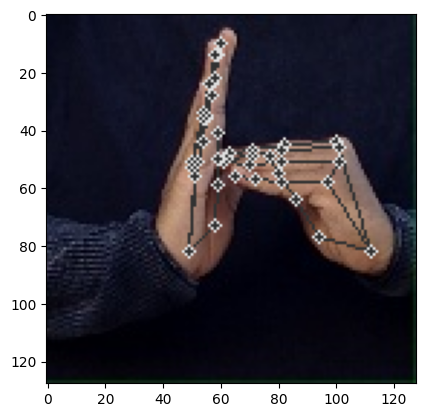

In [44]:
marker_size = 1
line_thickness = 1


for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_))[:1]:
        img = cv.imread(os.path.join(data_dir, dir_, img_path))
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    height, width, channel = img.shape
                    cx, cy = int(lm.x * width), int(lm.y * height)
                    cv.circle(img, (cx, cy), 10, (255, 0, 255), cv.FILLED)
                    mp_drawing.draw_landmarks( img_rgb,
                            hand_landmarks,  # model output
                            mp_hands.HAND_CONNECTIONS,  # hand connections
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(50, 50, 50), thickness=line_thickness, circle_radius=marker_size), connection_drawing_spec=mp_drawing.DrawingSpec(color=(50, 50, 50), thickness=line_thickness))

      
            plt.figure()
                
        plt.figure()
        plt.imshow(img_rgb)
           

plt.show()

In [43]:
f = open('mulitdata.pickle', 'wb')
pickle.dump({'data_1': data_1, 'labels_1': labels_1,'data_2': data_2, 'labels_2': labels_2}, f)
f.close()
print('Done')

Done
